In [3]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000, C=2.5)
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import pickle
file_name = "Log_model.sav"
cls = pickle.load(open(file_name, "rb"))
file_name = "tfidf.sav"
tfidf = pickle.load(open(file_name, "rb"))

In [6]:
Sample_correct = ["this is good ."]
Sample_misclassify = ["something is not wrong ."]
Sample_incorrect = ["this is not good ."]
Sample = Sample_incorrect
test = tfidf.transform(Sample)
test_y = cls.predict(test)
coeffcients = cls.coef_[0]
index_list = []
feature_name = tfidf.get_feature_names()
for s in Sample:
    for w in s.split(" "):
        index_list += [i for i, j in enumerate(feature_name) if j == w]
coef_for_sample = []
for s in Sample_incorrect:
    for i, w in enumerate(s.split(" ")):
        coef_for_sample.append((w, coeffcients[index_list[i]]))
        #print("%s: %f" % (w, coeffcients[index_list[i]]))
test_y_prob = cls.predict_proba(test)
print("Prediction: %d with confidence %f" % (cls.predict(test), cls.predict_proba(test)[0][cls.predict(test)]))

Prediction: 0 with confidence 0.649144


In [7]:
def ngrams(input, n):
  input = input.split(' ')
  output = []
  for i in range(len(input)-n+1):
    output.append(input[i:i+n])
  return output

['this is', 'is not', 'not good', 'good .', 'this', 'is', 'not', 'good', '.']


<IPython.core.display.Javascript object>


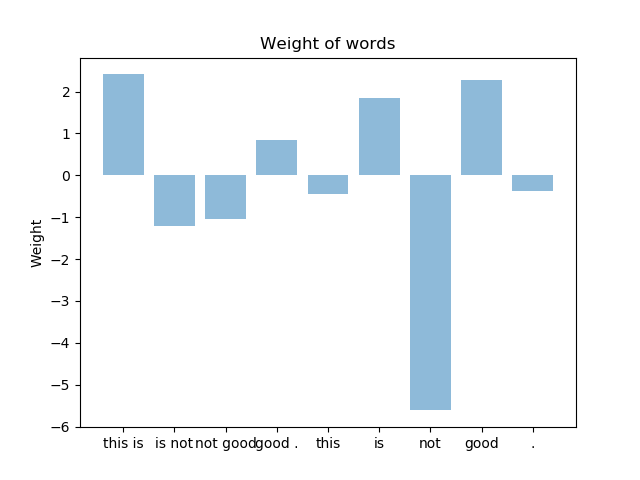

c:\users\raymondzhou\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.21.1 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [192]:
feature_to_weight = dict()
example_sentence_word = Sample[0].split(" ")
example_sentence = [' '.join(x) for x in ngrams(Sample[0], 2)]
example_sentence += example_sentence_word
weights = []
print(example_sentence)
for i, j in enumerate(feature_name):
    feature_to_weight[j] = i
for i, w in enumerate(example_sentence):
    index = feature_to_weight.get(w, -1)
    if index == -1:
        weights.append(0.0)
    else:
        weights.append(coeffcients[index])
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = example_sentence
y_pos = np.arange(len(objects))
performance = weights

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Weight')
plt.title('Weight of words')

plt.show()



In [233]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
temp = pickle.load(open("Log_model.sav", "rb"))

test_ = tfidf.transform(Sample)
a = widgets.FloatText(value =temp.predict_proba(test_)[0][temp.predict(test_)], description='Confidence:' )
b = widgets.Text(value = "Positive" if temp.predict(test_)== 1 else "Negative" , description='Predicted:' )

def on_value_change(change):
    temp.coef_[0][feature_to_weight[change['owner'].description]] = change['new']
    b.value = value = "Positive" if temp.predict(test_)== 1 else "Negative"
    a.value = temp.predict_proba(test_)[0][temp.predict(test_)]

kwarg = {}
for w in example_sentence:
    kwarg[w] = widgets.FloatSlider(min= -10.0,max=10.0,step=0.01,value=temp.coef_[0][feature_to_weight[w]], orientation='horizontal', description=w)
    kwarg[w].observe(on_value_change, names = 'value')

output = []
for w in kwarg:
    output.append(kwarg[w])

display(*output)
display(b)
display(a)



FloatSlider(value=2.4105362983014738, description='this is', max=10.0, min=-10.0, step=0.01)

FloatSlider(value=-1.220041518611471, description='is not', max=10.0, min=-10.0, step=0.01)

FloatSlider(value=-1.0514574693872487, description='not good', max=10.0, min=-10.0, step=0.01)

FloatSlider(value=0.8541897423018199, description='good .', max=10.0, min=-10.0, step=0.01)

FloatSlider(value=-0.44333906296170644, description='this', max=10.0, min=-10.0, step=0.01)

FloatSlider(value=1.846839462633557, description='is', max=10.0, min=-10.0, step=0.01)

FloatSlider(value=-5.61223609129487, description='not', max=10.0, min=-10.0, step=0.01)

FloatSlider(value=2.2795140851255957, description='good', max=10.0, min=-10.0, step=0.01)

FloatSlider(value=-0.37568028090544997, description='.', max=10.0, min=-10.0, step=0.01)

Text(value='Negative', description='Predicted:')

FloatText(value=0.6491444546739151, description='Confidence:')

In [68]:
def print_arg(**karg):
    for k in karg:
        print(karg[k])
l = {}
l["x"] = 1
print_arg(**l)

1


In [62]:
def print_arg(*arg):
    for i in arg:
        print(i)
l = [1,2,3,4]
print_arg(*l)

1
2
3
4
